In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
import tarfile
import io
import requests

## 1. Analysis of IMDB movie reviews


In [3]:
url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

response = requests.get(url)

tar = tarfile.open(mode="r:gz", fileobj=io.BytesIO(response.content))

tar.extractall()

In [8]:
PATH_TO_IMDB = './aclImdb'
reviews_train = load_files(container_path=os.path.join(PATH_TO_IMDB, "train"), categories=['pos', 'neg'])
reviews_test = load_files(container_path=os.path.join(PATH_TO_IMDB, 'test'), categories=['pos', 'neg'])

In [23]:
text_train, y_train = reviews_train.data, reviews_train.target
text_test, y_test = reviews_test.data, reviews_test.target

In [28]:
print("# training documents:", len(text_train))
print("# test documents:", len(text_test))

# training documents: 25000
# test documents: 25000


In [34]:
print(np.bincount(y_train))
print(np.bincount(y_test))

[12500 12500]
[12500 12500]


In [35]:
print(text_train[0])

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."


In [36]:
print(y_train[0])

1


## 2. A Simple Count of Words


In [47]:
cv = CountVectorizer()
cv.fit(text_train)
print(len(cv.vocabulary_))

74849


In [49]:
cv.get_feature_names()

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yards',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '105lbs',
 '106',
 '106min',
 '107',
 '108',
 '109',
 '10am',
 '10lines',
 '10mil',
 '10min',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '1100',
 '11001001',
 '1100ad',
 '111',
 '112',
 '1138',
 '114',
 '1146',
 '115',
 '116',
 '117',
 '11f',
 '11m',
 '11th',
 '12',
 '120',
 '1200',
 '1200f',
 '1201',
 '1202',
 '123',
 '12383499143743701',
 '1

In [62]:
%%time
logreg = LogisticRegression(n_jobs=-1)
logreg.fit(X_train, y_train)

Wall time: 3.49 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
logreg.score(X_train, y_train)

0.9818

In [67]:
X_test = cv.transform(text_test)

In [68]:
np.round(logreg.score(X_test, y_test), 2)

0.86

In [72]:
logreg.coef_

array([[-0.10881729, -0.04441408, -0.00958548, ...,  0.00108926,
        -0.05266029, -0.01353141]])

In [94]:
np.argsort(classifier.coef_).ravel()

array([72229, 18642, 50821, ..., 26380, 54378, 73498], dtype=int64)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

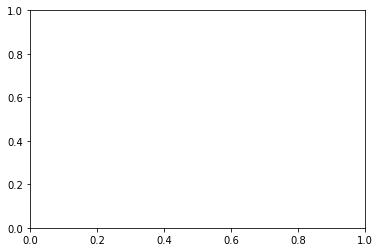

In [115]:
plt.gca().get_xticks()

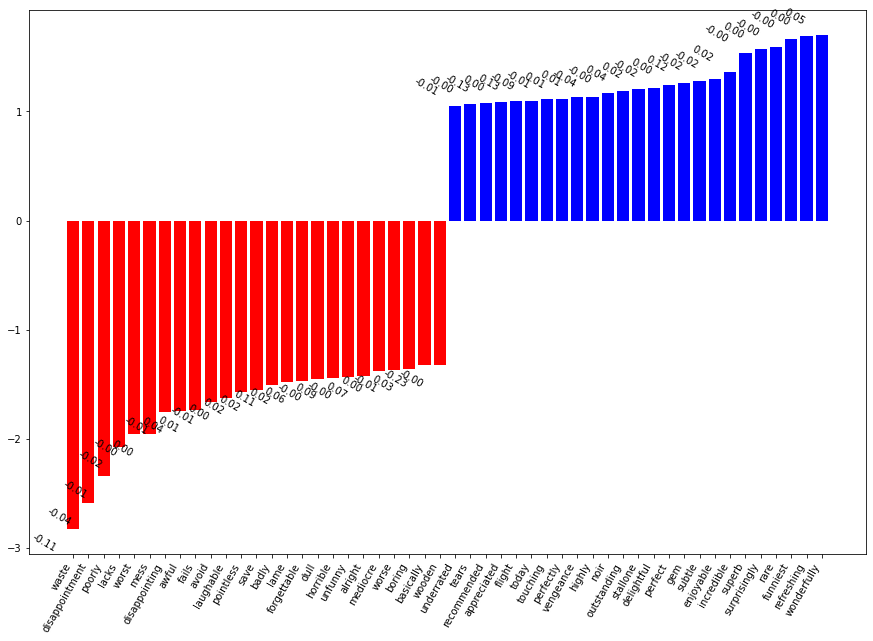

In [147]:
classifier = logreg
feature_names = cv.get_feature_names()
n_top_features = 25

pos_coef = np.argsort(classifier.coef_.ravel())[-n_top_features:]
neg_coef = np.argsort(classifier.coef_.ravel())[:n_top_features]
interesting_coef = np.hstack([neg_coef, pos_coef])

plt.figure(figsize=(15, 10))
colors = ["red" if c < 0 else "blue" for c in classifier.coef_.ravel()[interesting_coef]]
plt.bar(np.arange(n_top_features * 2), height=classifier.coef_.ravel()[interesting_coef], color=colors)
plt.xticks(np.arange(n_top_features * 2), np.array(feature_names)[interesting_coef], rotation=60, ha='right')
for i in range(len(interesting_coef)):
    y_ax = classifier.coef_.ravel()[interesting_coef[i]]
    plt.annotate('{:.2f}'.format(classifier.coef_.ravel()[i]), 
                 xy=(i-1, classifier.coef_.ravel()[interesting_coef[i]]),
                 xytext=(i-1, y_ax - 0.2 if y_ax < 0 else y_ax + 0.1 ), rotation=-30, ha="right")

In [102]:
feature_names

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yards',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '105lbs',
 '106',
 '106min',
 '107',
 '108',
 '109',
 '10am',
 '10lines',
 '10mil',
 '10min',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '1100',
 '11001001',
 '1100ad',
 '111',
 '112',
 '1138',
 '114',
 '1146',
 '115',
 '116',
 '117',
 '11f',
 '11m',
 '11th',
 '12',
 '120',
 '1200',
 '1200f',
 '1201',
 '1202',
 '123',
 '12383499143743701',
 '1

In [150]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("vectorizer", CountVectorizer()), ("logreg", LogisticRegression(n_jobs=-1, random_state=7))])
pipeline.fit(text_train, y_train)
pipeline.score(text_test, y_test)

0.86336

In [156]:
from sklearn.model_selection import GridSearchCV
param_grid = {"logreg__C": np.logspace(-10, 10, num=30, base=10)}
gridsearch = GridSearchCV(estimator=pipeline, param_grid=param_grid, return_train_score=True, n_jobs=-1, cv=3)
gridsearch.fit(text_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [157]:
gridsearch.best_params_

{'logreg__C': 0.09236708571873885}

In [158]:
gridsearch.best_score_

0.8849599580335505